<a href="https://colab.research.google.com/github/LyesDemri/AI-agent-learning-shortest-path-through-maze/blob/main/My_NN_vs_Tensorflow_for_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load data from files

In [ ]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
import csv

#load train file
file = open('sample_data/mnist_train_small.csv','r');
csvreader = csv.reader(file);
X = [0]*20000;
label = [0]*20000;
k=0;
for row in csvreader:
  label[k] = row[0];
  X[k] = row[1:];
  k+=1;
X = np.double(np.transpose(np.array(X)))/255;

T = np.zeros((10,20000));

for i in range(20000):
  T[int(label[i]),i] = 1;

#load test file
file = open('sample_data/mnist_test.csv','r');
csvreader = csv.reader(file);
X_test = [0]*10000;
label_test = [0]*10000;
k=0;
for row in csvreader:
  label_test[k] = row[0];
  X_test[k] = row[1:];
  k+=1;

X_test = np.double(np.transpose(np.array(X_test)))/255;

T_test = np.zeros((10,10000));

for i in range(10000):
  T_test[int(label_test[i]),i] = 1;

print('Data has been loaded')

Data has been loaded


Recognize digits with my own code first:

In [ ]:
#Generate network:
layers = ['ReLU']*9 + ['sigmoid'];
layers = ['sigmoid','sigmoid']
layers = ['sigmoid']*10;
print(layers)
n_layers = len(layers);
ILU = 784;  #input layer units
HLU = 10;   #hidden layer units
OLU = 10;   #output layer units
W = [0]*n_layers;
b = [0]*n_layers;

W[0] = np.random.rand(HLU,ILU)*0.1-0.05;
b[0] = np.random.rand(HLU,1)*0.1-0.05;
for i in range(1,n_layers-1):
  W[i] = np.random.rand(HLU,HLU)*0.1-0.05;
  b[i] = np.random.rand(HLU,1)*0.1-0.05;
W[n_layers-1] = np.random.rand(OLU,HLU)*0.1-0.05;
b[n_layers-1] = np.random.rand(OLU,1)*0.1-0.05;

#start training:

def logsig(x):
  y = np.zeros(np.shape(x));
  for i in range(len(x)):
    y[i] = 1/(1+np.exp(-x[i]));
  return y;

def ReLU(x):
  y = np.zeros(np.shape(x));
  for i in range(len(x)):
    y[i] = np.max([0,x[i]]);
  return y;
def derive(Y,layer_type):
  derivative = np.zeros(np.shape(Y));
  if layer_type == 'sigmoid':
    for i in range(len(Y)):
      derivative[i] = Y[i]*(1-Y[i]);
  elif layer_type == 'ReLU':
    for i in range(len(Y)):
      derivative[i] = 1;
  return derivative;

epochs = 10;
errors_list = np.zeros(epochs);
for epoch in range(epochs):
  for i in range(20000):
    #forward:
    Y = [0]*(n_layers+1);
    Y[0] = X[:,[i]];
    for l in range(n_layers):
      if layers[l] == 'sigmoid':
        Y[l+1] = logsig(W[l]@Y[l] + b[l]);
      elif layers[l] == 'ReLU':
        Y[l+1] = ReLU(W[l]@Y[l] + b[l]);

    dEdb = [0]*n_layers;
    dEdW = [0]*n_layers;
    d = 2*(Y[-1]-T[:,[i]])/10;
    for l in range(n_layers-1,-1,-1):
      d = d*derive(Y[l+1],layers[l]);
      dEdb[l] = d;
      dEdW[l] = d@Y[l].transpose();
      d = W[l].transpose()@d;
    
    for l in range(n_layers):
      W[l] = W[l] - 0.1*dEdW[l];
      b[l] = b[l] - 0.1*dEdb[l];
    
  errors = 0;
  for i in range(20000):
    #forward:
    Y = [0]*(n_layers+1);
    Y[0] = X[:,[i]];
    for l in range(n_layers):
      if layers[l] == 'sigmoid':
        Y[l+1] = logsig(W[l]@Y[l] + b[l]);
      elif layers[l] == 'ReLU':
        Y[l+1] = ReLU(W[l]@Y[l] + b[l]);
    a = np.argmax(Y[n_layers]);
    ca = np.argmax(T[:,[i]]);
    if ca!=a:
      errors+=1;

  errors_list[epoch] = errors*100/20000;
  print("Epoch ",epoch+1, ": ", 100-errors*100/20000, "% accuracy")

errors = 0;
for i in range(10000):
  #forward:
  Y = [0]*(n_layers+1);
  Y[0] = X_test[:,[i]];
  for l in range(n_layers):
    if layers[l] == 'sigmoid':
      Y[l+1] = logsig(W[l]@Y[l] + b[l]);
    elif layers[l] == 'ReLU':
      Y[l+1] = ReLU(W[l]@Y[l] + b[l]);
  a = np.argmax(Y[n_layers]);
  ca = np.argmax(T_test[:,[i]]);
  if ca!=a:
    errors+=1;
errors_on_test = errors *100/10000;
print("Accuracy on test set: ",100-errors_on_test);

['sigmoid', 'sigmoid', 'sigmoid', 'sigmoid', 'sigmoid', 'sigmoid', 'sigmoid', 'sigmoid', 'sigmoid', 'sigmoid']
Epoch  1 :  11.215000000000003 % accuracy
Epoch  2 :  11.215000000000003 % accuracy
Epoch  3 :  11.215000000000003 % accuracy


KeyboardInterrupt: ignored

Now let's use Tensorflow

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([tf.keras.layers.Input((784,)),
    tf.keras.layers.Dense(units = 10, activation = 'relu', kernel_initializer = 'HeUniform', bias_initializer = 'RandomUniform'),
    tf.keras.layers.Dense(units = 10, activation = 'relu', kernel_initializer = 'HeUniform', bias_initializer = 'RandomUniform'),
    tf.keras.layers.Dense(units = 10, activation = 'relu', kernel_initializer = 'HeUniform', bias_initializer = 'RandomUniform'),
    tf.keras.layers.Dense(units = 10, activation = 'relu', kernel_initializer = 'HeUniform', bias_initializer = 'RandomUniform'),    
    tf.keras.layers.Dense(units = 10, activation = 'sigmoid', kernel_initializer = 'RandomUniform', bias_initializer = 'RandomUniform')]);

model.compile(optimizer = tf.keras.optimizers.Adam(0.1), loss = '', metrics = 'accuracy')
model.fit(X.transpose(),T.transpose(),epochs = 1, batch_size = 1);
model.evaluate(X_test.transpose(), T_test.transpose(), batch_size = 1)

Epoch 1/10
20000/20000 [==============================] - 38s 2ms/step - loss: 0.1787 - accuracy: 0.1063
Epoch 2/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.1787 - accuracy: 0.1063
Epoch 3/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.1787 - accuracy: 0.1063
Epoch 4/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.1787 - accuracy: 0.1063
Epoch 5/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.1787 - accuracy: 0.1063
Epoch 6/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.1787 - accuracy: 0.1063
Epoch 7/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.1787 - accuracy: 0.1063
Epoch 8/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.1787 - accuracy: 0.1063
Epoch 9/10
20000/20000 [==============================] - 37s 2ms/step - loss: 0.1787 - accuracy: 0.1063
Epoch 10/10
10817/20000 [===============>..............

In [ ]:
#r = np.random.randint(0,10000);
#plt.imshow(np.reshape(X_test[:,range(10000)],(28,28)))
O = model.predict(X_test[:,range(10000)].transpose(),batch_size=1);
errors = 0;
for i in range(10000):
  a = np.argmax(O[i]);
  ca = np.argmax(T_test[:,i]);
  if a!=ca:
    errors+=1;
print("correct rate = ", 100-errors*100/10000);
print("error rate = ", errors*100/10000);
70.42+29.58

10000/10000 [==============================] - 12s 1ms/step
correct rate =  30.11
error rate =  69.89


100.0

Epoch 1/10
100/100 [==============================] - 1s 2ms/step - loss: 0.2985 - accuracy: 0.5000
Epoch 2/10
100/100 [==============================] - 0s 2ms/step - loss: 0.2809 - accuracy: 0.5000
Epoch 3/10
100/100 [==============================] - 0s 2ms/step - loss: 0.2657 - accuracy: 0.5000
Epoch 4/10
100/100 [==============================] - 0s 2ms/step - loss: 0.2527 - accuracy: 0.5000
Epoch 5/10
100/100 [==============================] - 0s 2ms/step - loss: 0.2415 - accuracy: 0.5400
Epoch 6/10
100/100 [==============================] - 0s 2ms/step - loss: 0.2314 - accuracy: 0.6400
Epoch 7/10
100/100 [==============================] - 0s 2ms/step - loss: 0.2221 - accuracy: 0.7700
Epoch 8/10
100/100 [==============================] - 0s 2ms/step - loss: 0.2132 - accuracy: 0.8400
Epoch 9/10
100/100 [==============================] - 0s 2ms/step - loss: 0.2046 - accuracy: 0.9300
Epoch 10/10
4/4 [==============================] - 0s 3ms/step - loss: 0.1893 - accuracy: 0.9700


ValueError: ignored

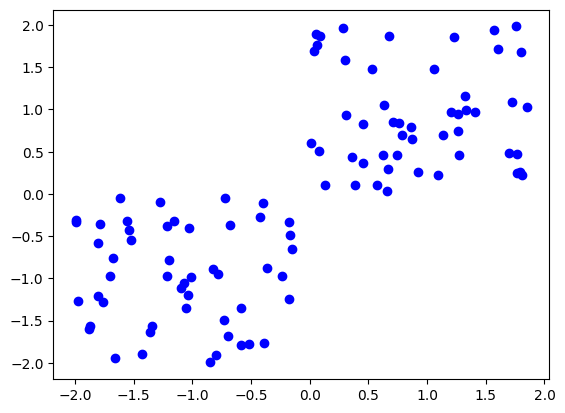

<Figure size 640x480 with 0 Axes>

In [ ]:
%reset -f

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

X = np.random.rand(2,100)*2-1;
X[:,range(50)]+=np.ones((2,50));
X[:,range(50,100)]+=np.ones((2,50))*(-1);
if True:
  plt.plot(X[0,range(50)],X[1,range(50)],'ob');
  plt.plot(X[0,range(50,100)],X[1,range(50,100)],'ob');

T = np.array([0]*50+[1]*50);

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(2,),
    tf.keras.layers.Dense(4,activation='sigmoid'),
    tf.keras.layers.Dense(1,activation='sigmoid')]
);
model.compile(optimizer = 'SGD', loss = 'MSE', metrics = 'accuracy');
model.fit(X.transpose(),T.transpose(),batch_size = 1,epochs=10);

X_test = np.random.rand(2,100)*2-1;
X_test[:,range(50)]+=np.ones((2,50));
X_test[:,range(50,100)]+=np.ones((2,50))*(-1);

T_test = np.array([0]*50+[1]*50);

model.evaluate(X_test.transpose(),T_test.transpose());

plt.figure();
for x1 in np.arange(-5,5,0.1):
  for x2 in np.arange(-5,5,0.1):
    x = np.array([x1,x2]);
    O = model.predict(x);
    if O>0.5:
      plt.plot